In [ ]:
#library for understanding music
from music21 import *

In [ ]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #My code
    try:

        #Looping over all the instruments
        for part in s2.parts:
        
            #select elements of only piano
            #if 'Piano' in str(part): 
            
            notes_to_parse = part.recurse() 
          
                #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

        return np.array(notes)
    
    except:
        print("skiping file")

In [ ]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='/content/drive/MyDrive/ML_project/AMG/instrumental/'

#read all the filenames
files = [i for i in os.listdir(path) if i.endswith(".mid")]

for i in files:

    midi = converter.parse(path+i)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)
    try:
        if s2.parts:
            print("considering")
    except:
        files.remove(i)
        print("discarding")

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
considering
cons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

374


(array([285.,  27.,  16.,   6.,   9.,  12.,   3.,   6.,   5.,   5.]),
 array([1.0000e+00, 1.5210e+02, 3.0320e+02, 4.5430e+02, 6.0540e+02,
        7.5650e+02, 9.0760e+02, 1.0587e+03, 1.2098e+03, 1.3609e+03,
        1.5120e+03]),
 <a list of 10 Patch objects>)

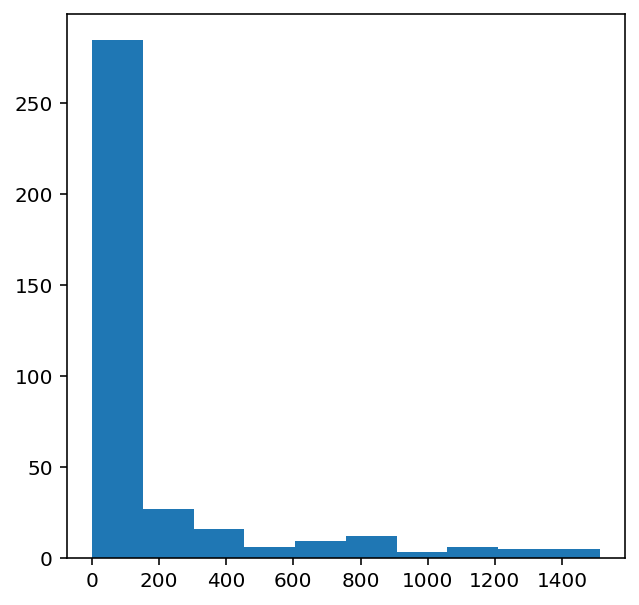

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=40]
print(len(frequent_notes))

147


In [ ]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
file2 = open("/content/drive/MyDrive/ML_project/AMG/unique_x_1.txt", 'w')
file2.write(str(unique_x))
file2.close()
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

print(len(x_val[0]))
file1 = open("/content/drive/MyDrive/ML_project/AMG/xval_1.txt", 'a')
for i in x_val:
    print(i)
    file1.write(str(i)+"\n")
file1.close()

Streaming output truncated to the last 5000 lines.
[ 28  72 101  76 139  39  56 115 131 102  39  28  24 106  21  54  24 115
   9  94 101  76 139  39 126 115  96  92  94  24 106  21]
[ 34  34  34  34  34  49  34  34  34  34  34  34 133  34 133  34 131  34
  76  34  77  34  34  34  34  34  34  34  34  34  34  34]
[127  24  72 127  89 109 127  72 127 109 127  72 127 104 109  58  72 131
  58 109  58  72  58 133 109  58  72  89  58 109  58  72]
[ 38 105  52  52  52  38  39  39  39  38  47  38  66  38 139 110 105  52
  52  52  93 105 107 109 107  62 105  13 107  25  67 105]
[ 54  54  42  42  54  24  54  42 133  42  82 121  54  54  42  54  42 113
 113  59  56  59  14 121  75  54  75  54   9  42  90  42]
[ 77 107  47  39  47  51 107  66  39  66 107  33  33 115  33  33 115  33
  33 115  33  33 115  66  66  89 105  66  87  66 133 105]
[128 103   8 110  12   8 131  28  73  77  62 131  97 133  77  28  89 133
  77  12  33 131  77  51 104 131 133  44  51  62 128  12]
[ 20 133 131  76  77  77  77  77

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(len(unique_x)))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  model.build((unique_x))
  model.summary()
  return model
model1 = lstm()

TypeError: ignored

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           14700     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
mc=ModelCheckpoint('/content/drive/MyDrive/ML_project/AMG/Models/instrumental.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=64,epochs=400, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/400
700/700 [==============================] - 36s 51ms/step - loss: 3.7874 - val_loss: 3.7311

Epoch 00001: val_loss improved from inf to 3.73106, saving model to /content/drive/MyDrive/ML_project/AMG/Models/instrumental.h5
Epoch 2/400
700/700 [==============================] - 35s 50ms/step - loss: 3.4602 - val_loss: 3.5360

Epoch 00002: val_loss improved from 3.73106 to 3.53595, saving model to /content/drive/MyDrive/ML_project/AMG/Models/instrumental.h5
Epoch 3/400
700/700 [==============================] - 36s 52ms/step - loss: 3.3061 - val_loss: 3.4028

Epoch 00003: val_loss improved from 3.53595 to 3.40281, saving model to /content/drive/MyDrive/ML_project/AMG/Models/instrumental.h5
Epoch 4/400
700/700 [==============================] - 36s 51ms/step - loss: 3.1954 - val_loss: 3.3188

Epoch 00004: val_loss improved from 3.40281 to 3.31877, saving model to /content/drive/MyDrive/ML_project/AMG/Models/instrumental.h5
Epoch 5/400
700/700 [==============================] - 3

KeyboardInterrupt: ignored